In [4]:
filepath = './原书代码数据/chapter10/demo/data/original_data.xls'
f = open(filepath,'rb')
data = pd.read_excel(f)
f.close()
data.head()

,热水器编号,发生时间,开关机状态,加热中,保温中,有无水流,实际温度,热水量,水流量,节能模式,加热剩余时间,当前设置温度
0,R_00001,20141019063917,关,关,关,无,30°C,0%,0,关,0分钟,50°C
1,R_00001,20141019070154,关,关,关,无,30°C,0%,0,关,0分钟,50°C
2,R_00001,20141019070156,关,关,关,无,30°C,0%,8,关,0分钟,50°C
3,R_00001,20141019071230,关,关,关,无,30°C,0%,0,关,0分钟,50°C
4,R_00001,20141019071236,关,关,关,无,29°C,0%,0,关,0分钟,50°C


In [10]:
result = data[['发生时间','开关机状态','加热中','保温中','实际温度','热水量','水流量','加热剩余时间','当前设置温度']]

In [35]:
result1 = result[False == (result.开关机状态 == '关') & (result.水流量 == 0)]
result1[:5]

,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
2,20141019070156,关,关,关,30°C,0%,8,0分钟,50°C
56,20141019073816,关,关,关,30°C,0%,8,0分钟,50°C
381,20141019094638,关,关,关,29°C,0%,16,0分钟,50°C
382,20141019094640,关,关,关,29°C,0%,13,0分钟,50°C
384,20141019094715,关,关,关,29°C,0%,20,0分钟,50°C


In [38]:
result1.发生时间 = pd.to_datetime(result1.发生时间,format='%Y%m%d%H%M%S')
result1[:5]

c:\python36\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C


In [40]:
result2 = result1[result1.水流量 > 0]

In [46]:
result2['diff'] = result2.发生时间.diff()
result2[:5]

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,diff
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,NaT
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,00:36:20
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,02:08:22
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,00:00:02
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,00:00:35


In [48]:
timehold = pd.Timedelta(minutes = 4)
result2['id'] = (result2.diff > timehold).cumsum() + 1
result2[:5]

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,发生时间,开关机状态,加热中,保温中,实际温度,热水量,水流量,加热剩余时间,当前设置温度,diff,id
2,2014-10-19 07:01:56,关,关,关,30°C,0%,8,0分钟,50°C,NaT,1
56,2014-10-19 07:38:16,关,关,关,30°C,0%,8,0分钟,50°C,00:36:20,2
381,2014-10-19 09:46:38,关,关,关,29°C,0%,16,0分钟,50°C,02:08:22,3
382,2014-10-19 09:46:40,关,关,关,29°C,0%,13,0分钟,50°C,00:00:02,3
384,2014-10-19 09:47:15,关,关,关,29°C,0%,20,0分钟,50°C,00:00:35,3


,事件数
1.25,227.0
1.50,218.0
1.75,207.0
2.25,197.0
2.50,194.0
2.75,191.0
3.25,181.0
3.50,178.0
3.75,174.0
4.25,172.0


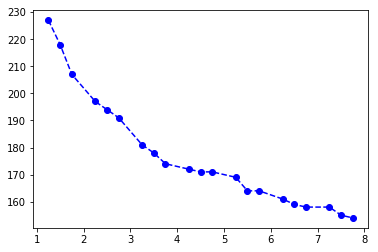

In [93]:
time_to_times = DataFrame(columns=['事件数'])
for i in range(1,8):
    for j in [0.25,0.5,0.75]:
        timehold = pd.Timedelta(minutes = i + j)
        id = (result2.diff > timehold).cumsum() + 1
        k = len(id.unique())    
        time_to_times.loc[i+j,:] = k
time_to_times.dropna()   
plt.plot(time_to_times,'bo--')